In [380]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [381]:
df_train = pd.read_csv("Dataset/kendaraan_train.csv")
df_train.drop(['id'], axis=1, inplace=True)

print("Total Dataset :", len(df_train))
df_train.sample(5)

Total Dataset : 285831


,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
100805,Wanita,22.0,1.0,46.0,1.0,< 1 Tahun,Tidak,27894.0,152.0,75.0,0
283857,Pria,46.0,1.0,46.0,0.0,1-2 Tahun,Pernah,21389.0,124.0,179.0,1
115072,Wanita,27.0,1.0,41.0,1.0,< 1 Tahun,Tidak,47908.0,152.0,NaN,0
271551,Wanita,23.0,1.0,15.0,1.0,< 1 Tahun,Tidak,44912.0,152.0,208.0,0
193434,Wanita,28.0,1.0,46.0,1.0,< 1 Tahun,Tidak,59901.0,152.0,62.0,0


In [382]:
df_test = pd.read_csv("Dataset/kendaraan_test.csv")

print("Total Dataset :", len(df_test))
df_test.sample(5)

Total Dataset : 47639


,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
7620,Wanita,23,1,30,1,< 1 Tahun,Tidak,25422,152,25,0
17037,Pria,49,1,28,1,1-2 Tahun,Tidak,26523,26,187,0
23082,Pria,52,1,41,0,1-2 Tahun,Pernah,36108,152,149,0
13654,Wanita,24,1,8,1,< 1 Tahun,Tidak,42862,152,289,0
39369,Wanita,78,1,33,0,1-2 Tahun,Pernah,35443,26,35,0


In [383]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      271391 non-null  object 
 1   Umur               271617 non-null  float64
 2   SIM                271427 non-null  float64
 3   Kode_Daerah        271525 non-null  float64
 4   Sudah_Asuransi     271602 non-null  float64
 5   Umur_Kendaraan     271556 non-null  object 
 6   Kendaraan_Rusak    271643 non-null  object 
 7   Premi              271262 non-null  float64
 8   Kanal_Penjualan    271532 non-null  float64
 9   Lama_Berlangganan  271839 non-null  float64
 10  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 24.0+ MB


In [384]:
df_train.isna().sum()


Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [385]:
df_test.isna().sum()


Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [386]:
duplicate = list(df_train.duplicated())
print("Data Duplikasi :", duplicate.count(True))

Data Duplikasi : 169


In [387]:
df_train.drop_duplicates(inplace=True)

In [388]:
duplicate = list(df_train.duplicated())
print("Data Duplikasi :", duplicate.count(True))

Data Duplikasi : 0


## **Label Encoding**


In [389]:
def label_encoding(df):
    df['Jenis_Kelamin'] = df['Jenis_Kelamin'].replace(['Wanita', 'Pria'], [0, 1])
    df['Umur_Kendaraan'] = df['Umur_Kendaraan'].replace(['< 1 Tahun', '1-2 Tahun', '> 2 Tahun'], [0, 1, 2])
    df['Kendaraan_Rusak'] = df['Kendaraan_Rusak'].replace(['Tidak', 'Pernah'], [0, 1])

label_encoding(df_train)
label_encoding(df_test)


In [390]:
# -2 Ke 2 Diisi Mean Berdasarkan Skewnessn Selain Itu Median
df_train['SIM'] = df_train['SIM'].fillna(df_train['SIM'].median())
df_train = df_train.fillna(df_train.mean())


In [391]:
df_train.isna().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

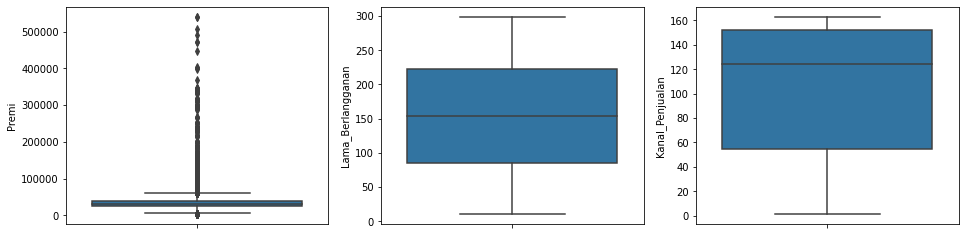

In [392]:
fig, ax = plt.subplots(ncols=3, figsize=(16, 4))
sns.boxplot(y='Premi', data=df_train, ax=ax[0])
sns.boxplot(y='Lama_Berlangganan', data=df_train, ax=ax[1])
sns.boxplot(y='Kanal_Penjualan', data=df_train, ax=ax[2])
plt.show()


In [393]:
# Q1 = df_train["Premi"].quantile(0.25)
# Q3 = df_train["Premi"].quantile(0.75)
# IQR = Q3 - Q1

# BB = Q1 - (1.5 * IQR)
# BA = Q3 + (1.5 * IQR)

# print("Batas Atas : ", BA)
# print("Batas Bawah : ", BB)

# df_train = df_train[~((df_train["Premi"] < BB) | (df_train["Premi"] > BA))]

# fig, ax = plt.subplots(ncols=3, figsize=(16, 4))
# sns.boxplot(y='Premi', data=df_train, ax=ax[0])
# sns.boxplot(y='Lama_Berlangganan', data=df_train, ax=ax[1])
# sns.boxplot(y='Kanal_Penjualan', data=df_train, ax=ax[2])
# plt.show()


## **Min Max Scaler**

In [394]:
numerical = [
    'Premi', 'Lama_Berlangganan', 'Umur', 'Kode_Daerah', 'Kanal_Penjualan', 
    'Jenis_Kelamin', 'SIM', 'Kendaraan_Rusak', 'Sudah_Asuransi', 'Umur_Kendaraan'
]

scaler = StandardScaler()

df_train[numerical] = scaler.fit_transform(df_train[numerical].values)
df_train.sample(5)


,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
124944,0.946297,-0.782875,0.045261,-0.418536,1.114408,-1.102610,-1.03581,-0.006404,0.965057,0.462056,0
129807,0.946297,1.662139,0.045261,1.362143,1.114408,0.705243,-1.03581,-1.670935,0.756843,1.772854,0
55866,-1.113009,-0.915037,0.045261,-1.425006,1.114408,-1.102610,-1.03581,0.035252,0.756843,0.217047,0
278335,0.946297,-1.245445,0.045261,-0.728219,1.114408,-1.102610,1.01588,-1.670935,0.965057,-1.106001,0
251261,-1.113009,-1.047200,0.045261,-1.579848,1.114408,-1.102610,-1.03581,-1.670935,0.756843,1.099079,0


In [395]:
df_test[numerical] = scaler.transform(df_test[numerical].values)
df_test.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
41030,-1.113009,-0.981119,0.045261,-1.425006,1.114408,-1.102610,-1.03581,-0.548599,0.756843,1.466593,0
4239,-1.113009,-0.254223,0.045261,1.516984,-0.944378,0.705243,1.01588,0.650645,0.851486,-0.873243,1
7170,0.946297,0.340510,0.045261,1.284722,-0.944378,0.705243,1.01588,-1.670935,-1.628152,-1.510266,0
40964,-1.113009,1.463894,0.045261,1.439564,-0.944378,0.705243,-1.03581,-0.099055,-1.628152,0.376303,0
40064,-1.113009,0.670917,0.045261,0.123410,-0.944378,0.705243,1.01588,1.081816,-1.628152,-0.027962,0


In [396]:
df_train_pca = df_train.copy()
df_test_pca = df_test.copy()

df_label_train = df_train['Tertarik']
df_label_test = df_test['Tertarik']

del df_train_pca['Tertarik']
del df_test_pca['Tertarik']


In [397]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
component = pca.fit_transform(df_train_pca)
component_test = pca.transform(df_test_pca)

df_train_pca = pd.DataFrame(data=component, columns=['Component_1', 'Component_2'])
df_train_pca['Tertarik'] = df_label_train.values

df_test_pca = pd.DataFrame(data=component_test, columns=['Component_1', 'Component_2'])
df_test_pca['Tertarik'] = df_label_test.values

df_train_pca.sample(5)

,Component_1,Component_2,Tertarik
247422,-2.291475,0.264669,0
1135,2.292304,0.090469,0
196550,-0.711967,0.875290,0
32146,-1.314255,0.771999,0
83087,1.369855,-0.744010,0


In [398]:
df_train.to_csv('Dataset/kendaraan_train_clean.csv', index=False)
df_test.to_csv('Dataset/kendaraan_test_clean.csv', index=False)

df_train_pca.to_csv('Dataset/kendaraan_train_pca_clean.csv', index=False)
df_test_pca.to_csv('Dataset/kendaraan_test_pca_clean.csv', index=False)
